In [24]:
#set libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from plotnine import *

In [16]:
#read files
df = pd.read_csv("../data/cleaned_data/final_data.csv")
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']), crs="EPSG:4326")

In [7]:
#unopened stations
unopened_stations = df[df["opened_station"] == 0]

In [10]:
#sorting it by highest traffic in 2019
unopened_stations = unopened_stations.sort_values(by="2019", ascending=False)

In [43]:
#identifying top 25%
unopened_stations["cutoff"] = np.where(unopened_stations["2019"] >= unopened_stations["2019"].describe()['75%'], True, False)

In [45]:
#assessing distribution
unopened_stations["cutoff"].value_counts()

cutoff
False    141
True      43
Name: count, dtype: int64

In [57]:
#reading in geographic data
dc = gpd.read_file('../data/raw_data/dc_shape_file') #dc census tracts

C:\Users\helen\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


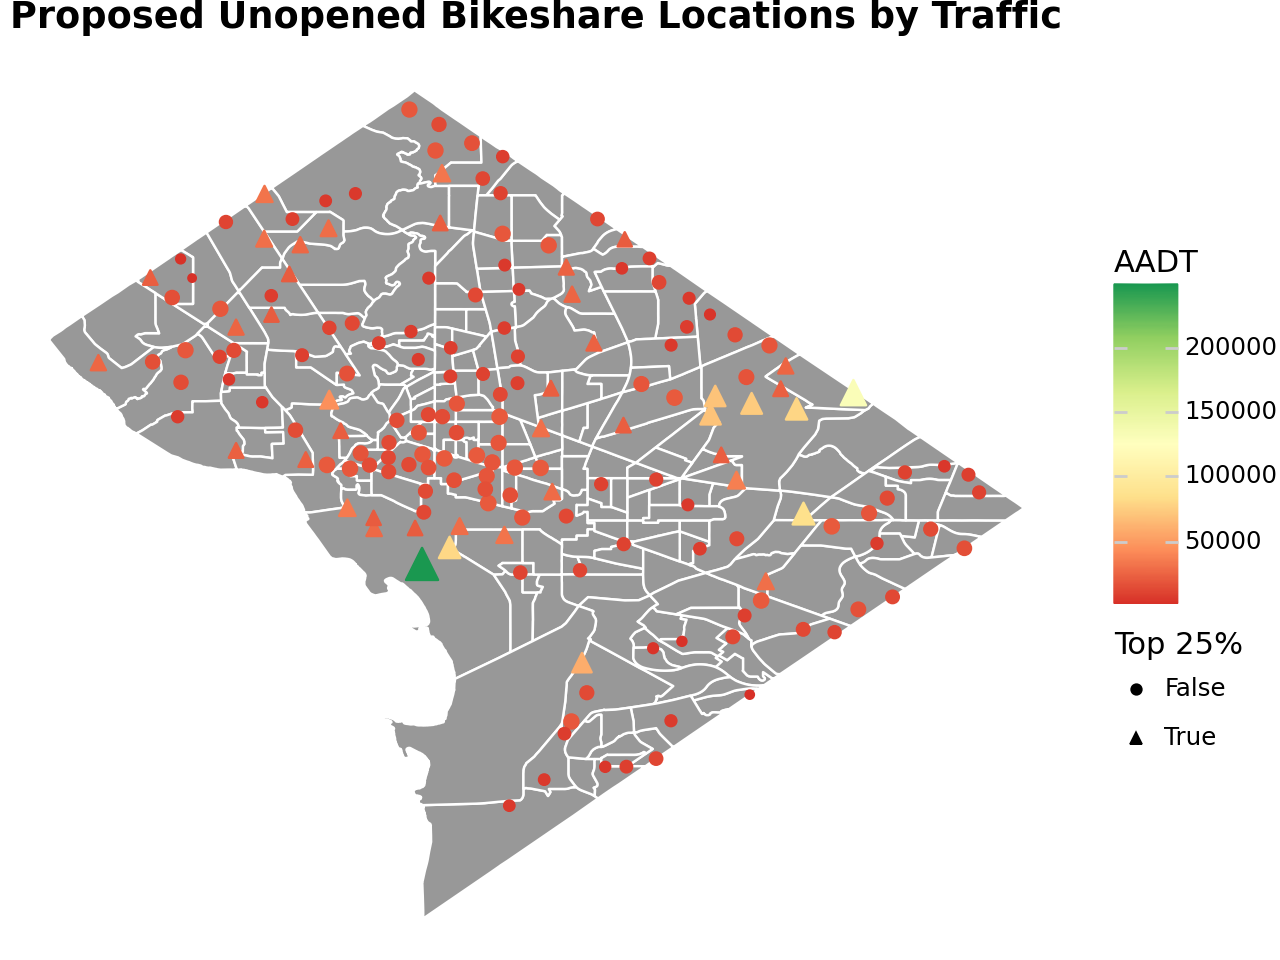

In [70]:
#plot of proposed, unopened bikeshares 
(
ggplot(data = unopened_stations) +
    geom_map(data = dc,
            mapping = aes(geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "2019", shape = "cutoff", size = "2019")
        ) +
    labs(title = "Proposed Unopened Bikeshare Locations by Traffic", color = "AADT", shape = "Top 25%") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1)  +
    guides(size = False)
)

In [75]:
unopened_stations[unopened_stations["cutoff"] == True].filter(["name", "long", "lat", "2019"]).reset_index()

,index,name,long,lat,2019
0,945,INTERSTATE 395 SOUTHBOUND OVER OHIO DRIVE SW,-77.039238,38.879069,249207.000000
1,910,NEW YORK AVENUE NE AND SOUTH DAKOTA AVENUE NE,-76.946187,38.921301,131048.000000
2,810,KENILWORTH AVENUE NE AND BLAINE STREET NE,-76.956956,38.891484,85395.000000
3,904,MAINE AVENUE SW AND EAST BASIN DRIVE SW,-77.033294,38.883135,80689.428571
4,920,NEW YORK AVENUE NE AND 36TH PLACE NE,-76.958450,38.917289,79874.000000
5,907,25TH PLACE NE AND BLADENSBURG ROAD NE,-76.968144,38.918650,73623.000000
6,919,MONTANA AVENUE NE AND 17TH STREET NE,-76.977000,38.915959,69933.000000
7,828,LAWRENCE AVENUE NE AND ADAMS STREET NE,-76.975992,38.920473,69933.000000
8,786,BROOKLEY AVENUE SW AND THOMAS ROAD SW,-77.004737,38.854729,59503.000000
9,929,30TH STREET NW AND BENTON PLACE NW,-77.059252,38.919569,44655.000000
